In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt


CDHWdata_1.csvbirthDeath0.csv
Top persistent homologies of 1 and dimension H0
    persitence              vector
0        2.925   + 1 * {       1 }
74       2.925   + 1 * {      77 }
13       2.875   + 1 * {      21 }
47       2.725   + 1 * {      52 }
52       2.725   + 1 * {      57 }
91       2.700   + 1 * {      92 }
1        2.675   + 1 * {      10 }
30       2.675   + 1 * {      37 }
43       2.675   + 1 * {      49 }
59       2.650   + 1 * {      63 }
CDHWdata_1.csvbirthDeath1.csv
Top persistent homologies of 1 and dimension H1
     persitence                                                                                                                                                                                                                                                                                                                    vector
3         0.600                                                                                                                  

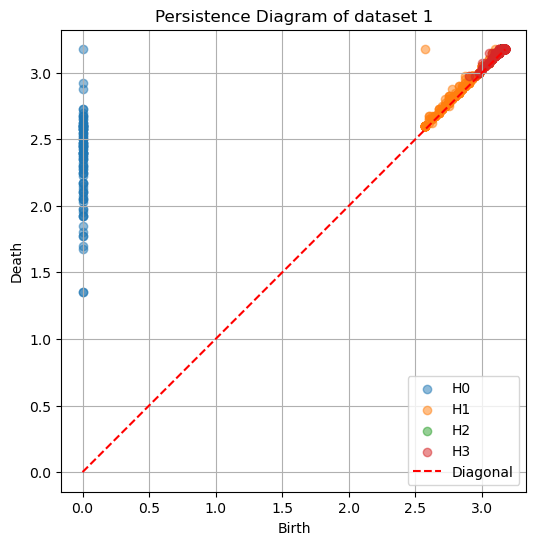

Top persistent homologies of 2 and dimension H0
    persitence              vector
70       3.050   + 1 * {      73 }
75       3.025   + 1 * {      78 }
74       2.975   + 1 * {      77 }
79       2.925   + 1 * {      81 }
55       2.825   + 1 * {       6 }
1        2.750   + 1 * {      10 }
71       2.725   + 1 * {      74 }
46       2.725   + 1 * {      51 }
28       2.700   + 1 * {      35 }
76       2.700   + 1 * {      79 }
CDHWdata_2.csvbirthDeath1.csv
Top persistent homologies of 2 and dimension H1
     persitence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ve

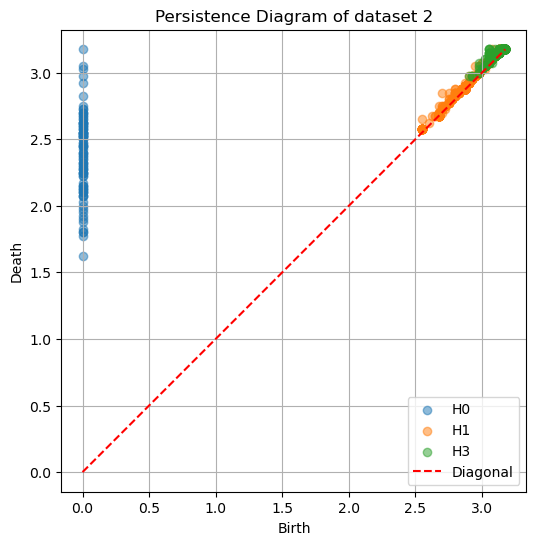

Top persistent homologies of 3 and dimension H0
    persitence              vector
44       2.975   + 1 * {       5 }
69       2.925   + 1 * {      72 }
87       2.900   + 1 * {      89 }
54       2.850   + 1 * {      59 }
4        2.850   + 1 * {      13 }
65       2.850   + 1 * {      69 }
3        2.825   + 1 * {      12 }
2        2.800   + 1 * {      11 }
6        2.775   + 1 * {      15 }
1        2.775   + 1 * {      10 }
CDHWdata_3.csvbirthDeath1.csv
Top persistent homologies of 3 and dimension H1
     persitence                                                                                                                                                                                                                                                                                                                                                                                                           vector
383       0.175                                                         

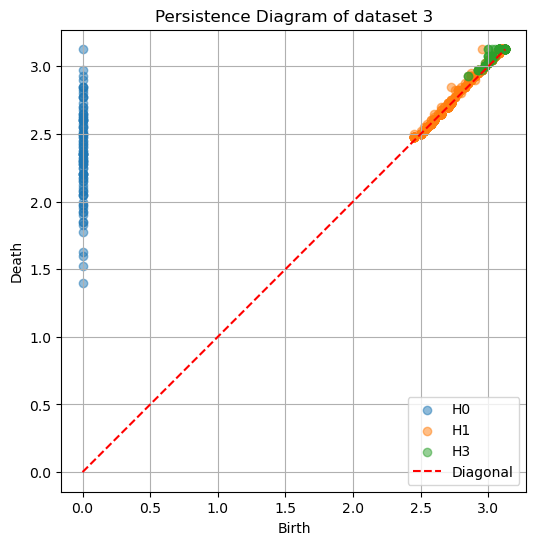

Top persistent homologies of 4 and dimension H0
    persitence              vector
67       2.950   + 1 * {      70 }
63       2.775   + 1 * {      67 }
59       2.750   + 1 * {      63 }
25       2.750   + 1 * {      32 }
68       2.750   + 1 * {      71 }
52       2.725   + 1 * {      57 }
45       2.650   + 1 * {      50 }
1        2.600   + 1 * {      10 }
2        2.600   + 1 * {      11 }
78       2.600   + 1 * {      80 }
CDHWdata_4.csvbirthDeath1.csv
Top persistent homologies of 4 and dimension H1
     persitence                                                                                                                                                                                                                                                                                                                                                                                                                                vector
0         0.075                                    

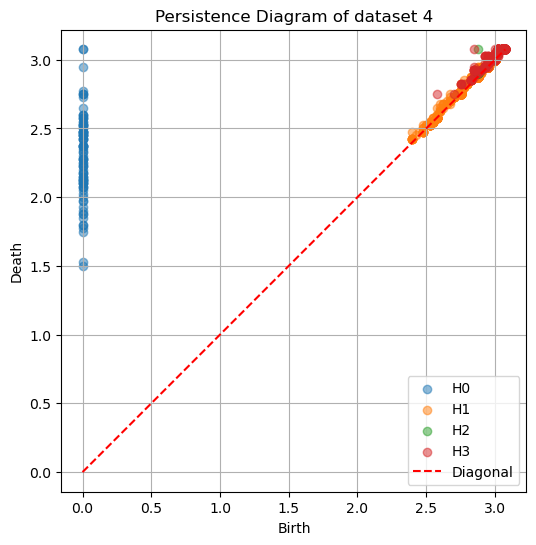

Top persistent homologies of 5 and dimension H0
    persitence              vector
8        2.950   + 1 * {      17 }
6        2.950   + 1 * {      15 }
48       2.875   + 1 * {      53 }
80       2.825   + 1 * {      82 }
68       2.775   + 1 * {      71 }
82       2.775   + 1 * {      84 }
40       2.750   + 1 * {      46 }
74       2.725   + 1 * {      77 }
10       2.675   + 1 * {      19 }
36       2.650   + 1 * {      42 }
CDHWdata_5.csvbirthDeath1.csv
Top persistent homologies of 5 and dimension H1
     persitence                                                                                                                                                                                                              vector
1         0.650                                                                                                                                                                                                                 NaN
84        0.150                  

In [108]:
myList = os.listdir()
myList.sort()
myFileNum = 0
myPrevFileNum = 0
myMainDf = []
true_max_value = 0
for file in myList:
    if 'birthDeath' in file and 'csv' in file and os.path.getsize(file) > 0:
        myFileNum = file.split('_')[1][0]
        print(file)
        df = pd.read_csv(file, header=None, on_bad_lines='skip')
        df = df.iloc[:, :3]
        df.columns = ['birth', 'death', 'vector']
        max_val = df[['death', 'birth']].max().max()
        if max_val > true_max_value:
            true_max_value = max_val
        if (myFileNum != myPrevFileNum) and myPrevFileNum != 0:
            plt.figure(figsize=(6, 6))
            for i, myDf in enumerate(myMainDf):   
                if myDf.shape[0] != 0:
                    print(myDf[myDf['death'] == -1])
                    myDf = myDf.replace(-1, true_max_value) 
                    plt.scatter(myDf['birth'], myDf['death'], label=f'H{i}', alpha=0.5)
            plt.plot([0, true_max_value], [0, true_max_value], 'r--', label='Diagonal')
            true_max_value = 0

            plt.xlabel('Birth')
            plt.ylabel('Death')
            plt.title(f'Persistence Diagram of dataset {myPrevFileNum}')
            plt.legend()
            plt.grid(True)
            plt.axis('equal')
            plt.show()
            myMainDf = [df]
        else:
            myMainDf.append(df)
        print(f'Top persistent homologies of {myFileNum} and dimension H{file[-5]}')
        df2 = df.replace(-1, true_max_value) 
        df2['persitence'] = df2['death'] - df2['birth']
        df2 = df2.sort_values(by='persitence', ascending=False)
        print(df2[['persitence', 'vector']].head(10).to_string())
        myPrevFileNum = myFileNum
    elif 'birthDeath' in file and 'csv' in file:
        myMainDf.append(pd.DataFrame())
if (myFileNum != myPrevFileNum) and myPrevFileNum != 0:
    plt.figure(figsize=(6, 6))
    for myDf in myMainDf:   
        print(myDf[myDf['death'] == -1])
        myDf = myDf.replace(-1, true_max_value) 
        plt.scatter(myDf['birth'], myDf['death'], label=f'H{file[-5]}', alpha=0.5)
    plt.plot([0, true_max_value], [0, true_max_value], 'r--', label='Diagonal')

    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title(f'Persistence Diagram of dataset {myPrevFileNum}')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()